# project 2 tmdb-movies
* This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue and budget_adj and revenue_adj are calculated in terms of 2010 dollars, accounting for inflation over time.


### This material is designed depending on the follwing sorces:
1. Search in google.com for material like:
 * merege two data frames
 * put value_counts in data frame
 * Plot types and codes in matplotlib
 
2. pandas.pydata.ord
3. note.nkmk.me

#### The following codes are for reading and viewing data set and its info. to decide the next steps. 

In [2]:
### Read tmdb-movies data and view first row
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
df=pd.read_csv('tmdb-movies.csv')
df.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


In [3]:
### Show general information to decide how to deal with data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

# From above codes' output

## we have the following columns in the data set

  id, imdb_id, popularity	, budget, revenue,	original_title,	cast,	homepage,	director,	tagline	keywords,	overview,	runtime	genres,	production_companies,	release_date,	vote_count,	vote_average,	release_year,	budget_adj,	revenue_adj

 ## So,I decided to drop the follwing columns 
   imdb_id, budget,	revenue,   homepage,  tagline,	keywords,	 overview	
    budget and revenue ar dropped as budget_adj and revenue_adj will be used to calcuate net investment and profit from movies production.


## And I created the new df_e with columns :
   id , popularity	 ,   original_title	cast , director , runtime ,	genres ,	production_companies ,	release_date ,	vote_count , vote_average , release_year ,	budget_adj , revenue_adj
    
## From  the new df_e we will going through the following :
### 1. Cleaning the data:
   1. Remove unwanted columns that will not be used during our statistics
   2. from info() above release_date type is object, so it will be changed to datetime.
   3. Remove duplicated rows and confirm no duplicated row or id exists in the data set
   4. start dealing with columns with no Null values
   5. then, dealing with remain columns


### Then, we will going through the following questions:

#### 1. what is the effect of release_year on the following:
   A. Number of movies
   B. Quality of movies
    
#### 2. what is the effect of release_year on the following:
   A. budget_adj for movies production depending on yearly average budget_adj
   B. revenue_adj from movies depending on yearly average revenue_adj
   C. profit of movies production depending on yearly average profit
    
#### 3. what is the effect of runtime on the following:
   A. Number of watching using vote_number
   B. Top 10 runtime of total vote_count over years
   C. Best runtime period in minites  attracting more vote_counts (watching times)
    
#### 4. From production_companies we will answer the following:
   A. Most sharing production companies over the years regardless of their position in production_companies column
   
   B.  Most sharing production companies over the years depending on their position in production_companies column
   
   C. The most total sharing production company (company name and its share no.) per decade.
   
   D. The most total sharing production company (company name and its share no.) per year.
    
#### 5. From genre we will answer the following:
   A. Most produced genre over the years regardless of their position in genre column
   
   B. Most produced genre over the years depending on their position in genre column
   
   C. The most total  produced genre (genre name and number) per decade.
   
   D. The most total  produced genre (genre name and number) per year.

### 1. Cleaning the data:
   1. Remove unwanted columns that will not be used during our statistics
   2. from info() above release_date type is object, so it will be changed to datetime.

In [4]:
### New df_e after cleaning unwanted columns 
df_e=df.drop(columns=['imdb_id','budget','revenue','homepage','tagline','keywords','overview'])
# change data of release_date to datetime format
df_e.release_date=pd.to_datetime(df_e.release_date)
df_e.head(1)

,id,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09


### 1. Cleaning the data:
   3. Remove duplicated rows and confirm no duplicated row or id exists in the data set

In [5]:
### Confirm duplicates
b=sum(df_e.duplicated())
df_e.drop_duplicates(inplace=True)
a=sum(df_e.duplicated())
print('number of duplicated rows of df_e before was {} and after removing duplicates becomes {}.'.format(b,a))

number of duplicated rows of df_e before was 1 and after removing duplicates becomes 0.


In [6]:
df_e.id.count()==df_e.id.nunique()  ### confirm no movie id is repeated

True

#### 1. what is the effect of release_year on the following:
   A. Number of movies
   
   B. Quality of movies

The number of movies as per blow graph is trending upward over the years 
the year of Max number of movies is year 2014 with total movies production of 700 movies


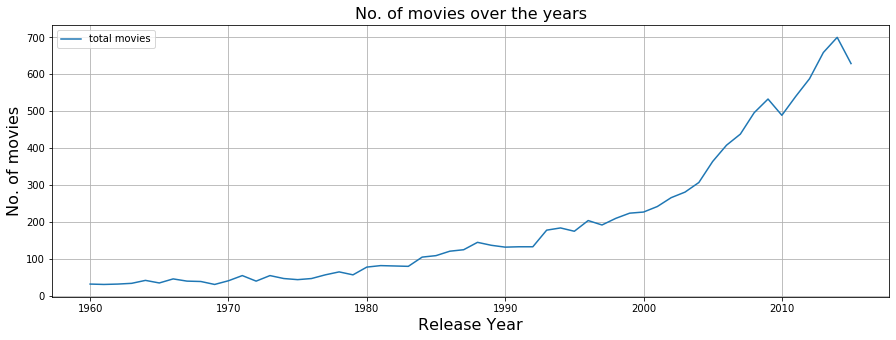

In [7]:
###
# total movies for each year
df_m_y=df_e.groupby('release_year',as_index=False).id.count()  
#ploting
plt.figure(figsize=(15,5))
plt.plot(df_m_y.release_year,df_m_y.id,label='total movies')
#Labels and legend
plt.xlabel('Release Year',fontsize=16)
plt.ylabel('No. of movies',fontsize=16)
plt.title('No. of movies over the years',fontsize=16)
plt.legend()
plt.grid()
# Year of max total movies
labels=['Release Year','No. of movies']
max_my=df_m_y.id.max()                                  
y=df_m_y.query('id=={}'.format(max_my))

print('The number of movies as per blow graph is trending upward over the years','\n'
      'the year of Max number of movies is year {} with total movies production of {} movies'.format(y.release_year.sum(),y.id.sum()))

,release_year,vote_average
Max Mean,1973,6.703636
Max Max,2011,9.200000
Min Min,1966,1.500000
Min Min,2007,1.500000


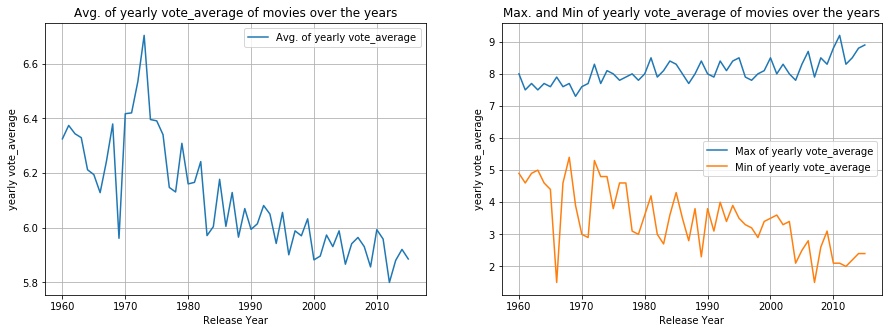

In [8]:
###
# Mean, Min and Max movies yearly vote_average for each year
df_vam_y=df_e.groupby('release_year',as_index=False).vote_average.mean()  #Mean
df_vax_y=df_e.groupby('release_year',as_index=False).vote_average.max()   #Max
df_van_y=df_e.groupby('release_year',as_index=False).vote_average.min()   #Min

#plotting
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.plot(df_vam_y.release_year,df_vam_y.vote_average,label='Avg. of yearly vote_average')
plt.title('Avg. of yearly vote_average of movies over the years')
plt.xlabel('Release Year')
plt.ylabel('yearly vote_average')
plt.legend()
plt.grid()

plt.subplot(1,2,2)
plt.plot(df_vax_y.release_year,df_vax_y.vote_average,label='Max of yearly vote_average')
plt.plot(df_van_y.release_year,df_van_y.vote_average,label='Min of yearly vote_average')
plt.title('Max. and Min of yearly vote_average of movies over the years')
plt.xlabel('Release Year')
plt.ylabel('yearly vote_average')
plt.legend()
plt.grid()
plt.show


# Year of max mean, max max and min min yearly vote_average movies per year
max_vay=df_vam_y.vote_average.max()
max_xay=df_vax_y.vote_average.max()
max_nay=df_van_y.vote_average.min()


df_temp1=df_vam_y.query('vote_average=={}'.format(max_vay))
df_temp2=df_vax_y.query('vote_average=={}'.format(max_xay))
df_temp3=df_van_y.query('vote_average=={}'.format(max_nay))
df_temp=df_temp1.append([df_temp2,df_temp3],sort=True)
df_temp.rename(index={13:'Max Mean',51:'Max Max',6:'Min Min',47:'Min Min'})

Plots of Mean and diff of vote_average of movies over the years .
 Diff is (Max - Min) of vote_average of movies


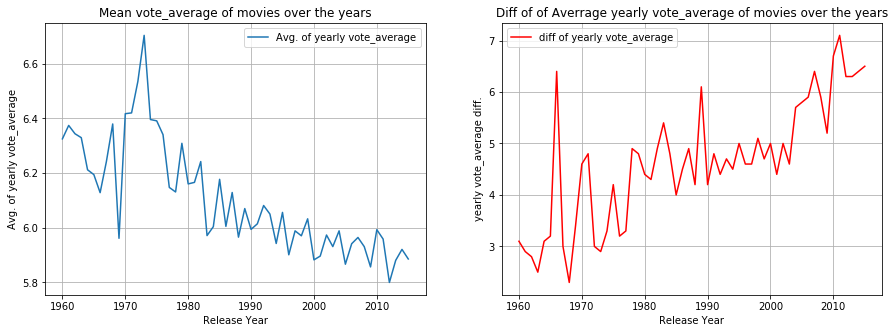

In [9]:
###
# Mean, diff (Min - Max) movies vote_average for each year
df_vam_y=df_e.groupby('release_year',as_index=False).vote_average.mean()  #Mean
df_vad=df_vax_y.vote_average - df_van_y.vote_average                                              #Diff
df_vam_y['diff']=df_vad
#plotting
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.plot(df_vam_y.release_year,df_vam_y.vote_average,label='Avg. of yearly vote_average')
plt.title('Mean vote_average of movies over the years')
plt.xlabel('Release Year')
plt.ylabel('Avg. of yearly vote_average')
plt.legend()
plt.grid()

plt.subplot(1,2,2)
plt.plot(df_vam_y.release_year,df_vam_y['diff'],color='r',label='diff of yearly vote_average')
plt.title('Diff of of Averrage yearly vote_average of movies over the years')
plt.xlabel('Release Year')
plt.ylabel('yearly vote_average diff.')
plt.legend()
plt.grid()
plt.show
#Labels and legend

print('Plots of Mean and diff of vote_average of movies over the years','.\n','Diff is (Max - Min) of vote_average of movies')

### 1.  Conclosions on the effect of release_year on the following:
#### A. Number of movies
   * The number of movies is trending up with years which reflects the improvement of movies industry, 
        it turned into mass production and people have more free time to watch produced movies.
        
#### B. Quality of movies
##### From [Avg. of yearly vote_average of movies over the years] graph,
   * we found the average quality of yearly produced movies is trending down.
        which in general means reduction of movies quality over years.
        
##### However, From [Max. and Min of yearly vote_average of movies over the years] graph,
   * we found the maximum average quality of yearly produced movies is increasing over years and minimum
        average quality of yearly produced movies is increasing over years.
        This gives us more deaper information about yearly average quality of movies:
        
        1. As above; there is reduction of movies yearly average quality over years.
        2. Quality of movies is increasing with years, while number of high quality movie becomes less and
        less as a percent of the total yearly produced movies.
        And that is reflected in the average quality of yearly produced movies.
        
##### From [Diff of of Averrage yearly vote_average of movies over the years] graph,
   * The gap between max. and min. yearly average quality is increasing over years. That means the more high
        quality movies gets higher and the more low quality movies gets lower.

#### 2. what is the effect of release_year on the following:
   A. budget_adj for movies production depending on yearly average budget_adj
   
   B. revenue_adj from movies depending on yearly average revenue_adj
   
   C. profit of movies production depending on yearly average profit

Below table contains max yearly average budget_adj and revenue_adj 


,release_year,budget_adj,revenue_adj
0,1999,3.369195e+07,NaN
1,1977,NaN,1.376362e+08


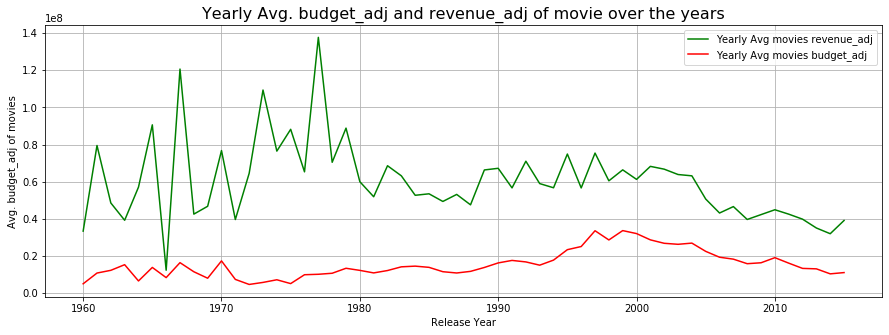

In [10]:
###
# Mean budget_adj and Mean of movies for each year
df_bj_y=df_e.groupby('release_year',as_index=False).budget_adj.mean()  # mean movies budget_adj for each year
df_rj_y=df_e.groupby('release_year',as_index=False).revenue_adj.mean() # mean movies revenue_adj for each year
#plotting
plt.figure(figsize=(15,5))

plt.plot(df_rj_y.release_year,df_rj_y.revenue_adj,color='g',label='Yearly Avg movies revenue_adj')
plt.plot(df_bj_y.release_year,df_bj_y.budget_adj,color='r',label='Yearly Avg movies budget_adj')

#Labels and legend
plt.xlabel('Release Year')
plt.ylabel('Avg. budget_adj of movies')
plt.title('Yearly Avg. budget_adj and revenue_adj of movie over the years',fontsize=16)
plt.legend()
plt.grid()

# Year of max mean budget_adj and mean revenue_adj of movies
labels=['Release Year','mean budget_adj', 'mean revenue_adj']

max_bjy=df_bj_y.budget_adj.max()
df_temp1=df_bj_y.query('budget_adj=={}'.format(max_bjy))

max_rjy=df_rj_y.revenue_adj.max()
df_temp2=df_rj_y.query('revenue_adj=={}'.format(max_rjy))
print('Below table contains max yearly average budget_adj and revenue_adj ')
df_temp1.merge(df_temp2,how='outer')

In [11]:
### Add profit Column to df_e by subtracting budget_adj from revenue_adj
profit=df_e.revenue_adj-df_e.budget_adj
df_e['profit']=profit
df_e.head(1)

,id,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09


Max profit is 1.27e+08  $ at year 1977 


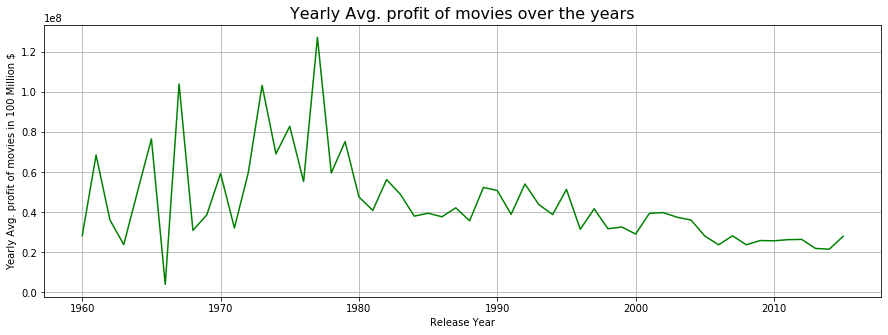

In [12]:
###
plt.figure(figsize=(15,5))

df_pr_y=df_e.groupby('release_year',as_index=False).profit.mean()  # mean movies profit for each year
plt.plot(df_pr_y.release_year,df_pr_y.profit,color='g')

plt.xlabel('Release Year')
plt.ylabel('Yearly Avg. profit of movies in 100 Million $')
plt.title('Yearly Avg. profit of movies over the years',fontsize=16)
plt.grid()

max_avpr=df_pr_y.profit.max()                                  # max average profit 
y=df_pr_y.query('profit=={}'.format(max_avpr))
print('Max profit is {:.3}  $ at year {} '.format(y.profit.sum(),y.release_year.sum()))

### 2. Conclosions on the effect of release_year on the following:
    
##### From [Yearly Avg. budget_adj and revenue_adj of movie over the years] graph,
#### A. budget_adj for movies production depending on yearly average budget_adj
   * budget_adj which is calculated on 2010 dollar is:
        Stable     over the years from the begining to year 1993.
        Increasing over the years from year 1993 to year 2000.
        Decreasing over the years from year 2000 to till now.
        
#### B. revenue_adj from movies depending on yearly average revenue_adj
#### C. profit of movies production depending on yearly average profit
##### From [Yearly Avg. profit of movies over the years] graph,
   * Profit which is calculated on 2010 dollar is:
        Increasing over the years from the begining to year 1980.
        Stable     over the years from year 1980 to year 2004 at a lower porfit than previous period.
        Stable     over the years from year 2006 to till now at  a lower porfit than previous period. 

#### 3. what is the effect of runtime on the following:
  A. Number of averge watching using vote_number
  
  B. Top 10 runtime of total vote_count over years
  
  C. Best runtime period in minites  attracting more vote_counts (watching times)

Below table of top 10 out of 247 avg. vote_count around (0.04% of total count of avg. vote_count )represent 33.35% of total sum of avg. vote_count 
 Best movie runtime ranges from 142 min. to 201 min.


,runtime,vote_count
188,194,4654.000000
164,169,3790.800000
193,201,2837.500000
160,165,2478.571429
192,200,2131.000000
174,179,1730.666667
137,142,1684.785714
138,143,1587.904762
143,148,1456.000000
157,162,1434.000000


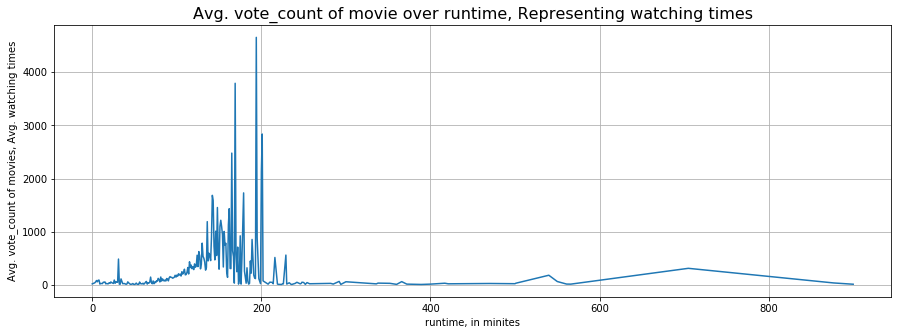

In [13]:
###
#Avg vote for runtime of movies
df_v_rt=df_e.groupby('runtime',as_index=False).vote_count.mean()

plt.figure(figsize=(15,5))
plt.plot(df_v_rt.runtime,df_v_rt.vote_count)

plt.xlabel('runtime, in minites')
plt.ylabel('Avg. vote_count of movies, Avg. watching times')
plt.title('Avg. vote_count of movie over runtime, Representing watching times',fontsize=16)
plt.grid()
 
# max average vote_count 
max_vrt=df_v_rt.vote_count.max()                                 
temp=df_v_rt.query('vote_count=={}'.format(max_vrt))
temp.rename(index={188:'Max Avg. vote_count'})

y=df_v_rt.sort_values('vote_count',ascending=False) # arrange value by vote_count Desc.

#Top 10 average vote_count 
total=y.vote_count.count()
around=10/total
top_10_ratio=(y.head(10).vote_count.sum()/y.vote_count.sum())*100
print('Below table of top 10 out of {:.0f} avg. vote_count around ({:.2f}% of total count of avg. vote_count )represent {:.2f}% of total sum of avg. vote_count'.format(total,around,top_10_ratio),
     '\n','Best movie runtime ranges from {:.0f} min. to {:.0f} min.'.format(y.head(10).runtime.min(),y.head(10).runtime.max()))
y.head(10)

### 3. Conclosions on the effect of runtime on the following:  
 ##### From [Avg. vote_count of movie over runtime, Representing watching times] graph,
#### A. Number of watching using vote_number
   * In general very low runtime and very high runtime movies have less average watching time
       
#### B. Top 10 runtime of total vote_count over years:
   * Top 10 average watching times movies are contained in table above, which are only 0.04% of total runtime
    counts represent 33.3% of total average watching times.
    
#### C. Best runtime period in minites  attracting more vote_counts (watching times)
   * From B. we can say the best runtimes range from 142 to 201 min. as they represent 1/3 of the average
    watching times.

#### 4. From production_companies we will answer the following:
   A. Most sharing production companies over the years regardless of their position in production_companies column
   
   B. Most sharing production companies over the years depending on their position in production_companies column
   
   C. The most total sharing production company (company name and its share no.) per decade.
   
   D. The most total sharing production company (company name and its share no.) per year.

In [14]:
### pd_e_pcom is a new df by removing null values depending on production companies

df_e_pcom=df_e.dropna(subset=['production_companies'])
df_e_pcom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9835 entries, 0 to 10865
Data columns (total 15 columns):
id                      9835 non-null int64
popularity              9835 non-null float64
original_title          9835 non-null object
cast                    9799 non-null object
director                9814 non-null object
runtime                 9835 non-null int64
genres                  9826 non-null object
production_companies    9835 non-null object
release_date            9835 non-null datetime64[ns]
vote_count              9835 non-null int64
vote_average            9835 non-null float64
release_year            9835 non-null int64
budget_adj              9835 non-null float64
revenue_adj             9835 non-null float64
profit                  9835 non-null float64
dtypes: datetime64[ns](1), float64(5), int64(4), object(5)
memory usage: 1.2+ MB


In [15]:
### Repeated same companies share in movies production
share=df_e_pcom.production_companies.nunique()/df_e_pcom.production_companies.count()
print('Repeated same companies share in movies production is {:.2}%, So the column need split'.format(share))

Repeated same companies share in movies production is 0.76%, So the column need split


In [16]:
###
# Split production_companies column data: to df_pcom df to be used for all below cells

df_pcom=df_e_pcom.production_companies.str.lower().str.split("|", n =-1, expand =True)
df_pcom['release_year']=df_e_pcom.release_year
df_pcom.rename(columns={0:'main',1:'sub',2:'third',3:'forth',4:'fifth'},inplace=True)
df_pcom.head(2)

,main,sub,third,forth,fifth,release_year
0,universal studios,amblin entertainment,legendary pictures,fuji television network,dentsu,2015
1,village roadshow pictures,kennedy miller productions,None,None,None,2015


In [17]:
###
# main, sub, third, forth and fifth production_companies of each movie for all years

main_co=df_pcom['main'].value_counts().reset_index().sort_values('main')
sub_co=df_pcom['sub'].value_counts().reset_index().sort_values('sub')
third_co=df_pcom['third'].value_counts().reset_index().sort_values('third')
forth_co=df_pcom['forth'].value_counts().reset_index().sort_values('forth')
fifth_co=df_pcom['fifth'].value_counts().reset_index().sort_values('fifth')
main_co.columns=['production_company','main_count']
sub_co.columns=['production_company','sub_count']
third_co.columns=['production_company','third_count']
forth_co.columns=['production_company','forth_count']
fifth_co.columns=['production_company','fifth_count']

In [18]:
###
# new data frame using merge to combine most total sharing production companies regardless of their position in col.

df_pcom_ed=main_co.merge(sub_co,how='right').merge(third_co,how='right').merge(forth_co,how='right').merge(fifth_co,how='right')
total=df_pcom_ed.main_count+df_pcom_ed.sub_count+df_pcom_ed.third_count+df_pcom_ed.forth_count+df_pcom_ed.fifth_count
df_pcom_ed['total_counts']=total
df_pcom_ed=df_pcom_ed.sort_values('total_counts',ascending=False)
df_pcom_ed.head(5)

,production_company,main_count,sub_count,third_count,forth_count,fifth_count,total_counts
83,warner bros.,172.0,169.0,93.0,55.0,20,509.0
82,metro-goldwyn-mayer (mgm),104.0,66.0,29.0,10.0,9,218.0
81,touchstone pictures,72.0,64.0,27.0,10.0,5,178.0
68,relativity media,11.0,23.0,40.0,27.0,7,108.0
64,canal+,10.0,19.0,30.0,19.0,14,92.0


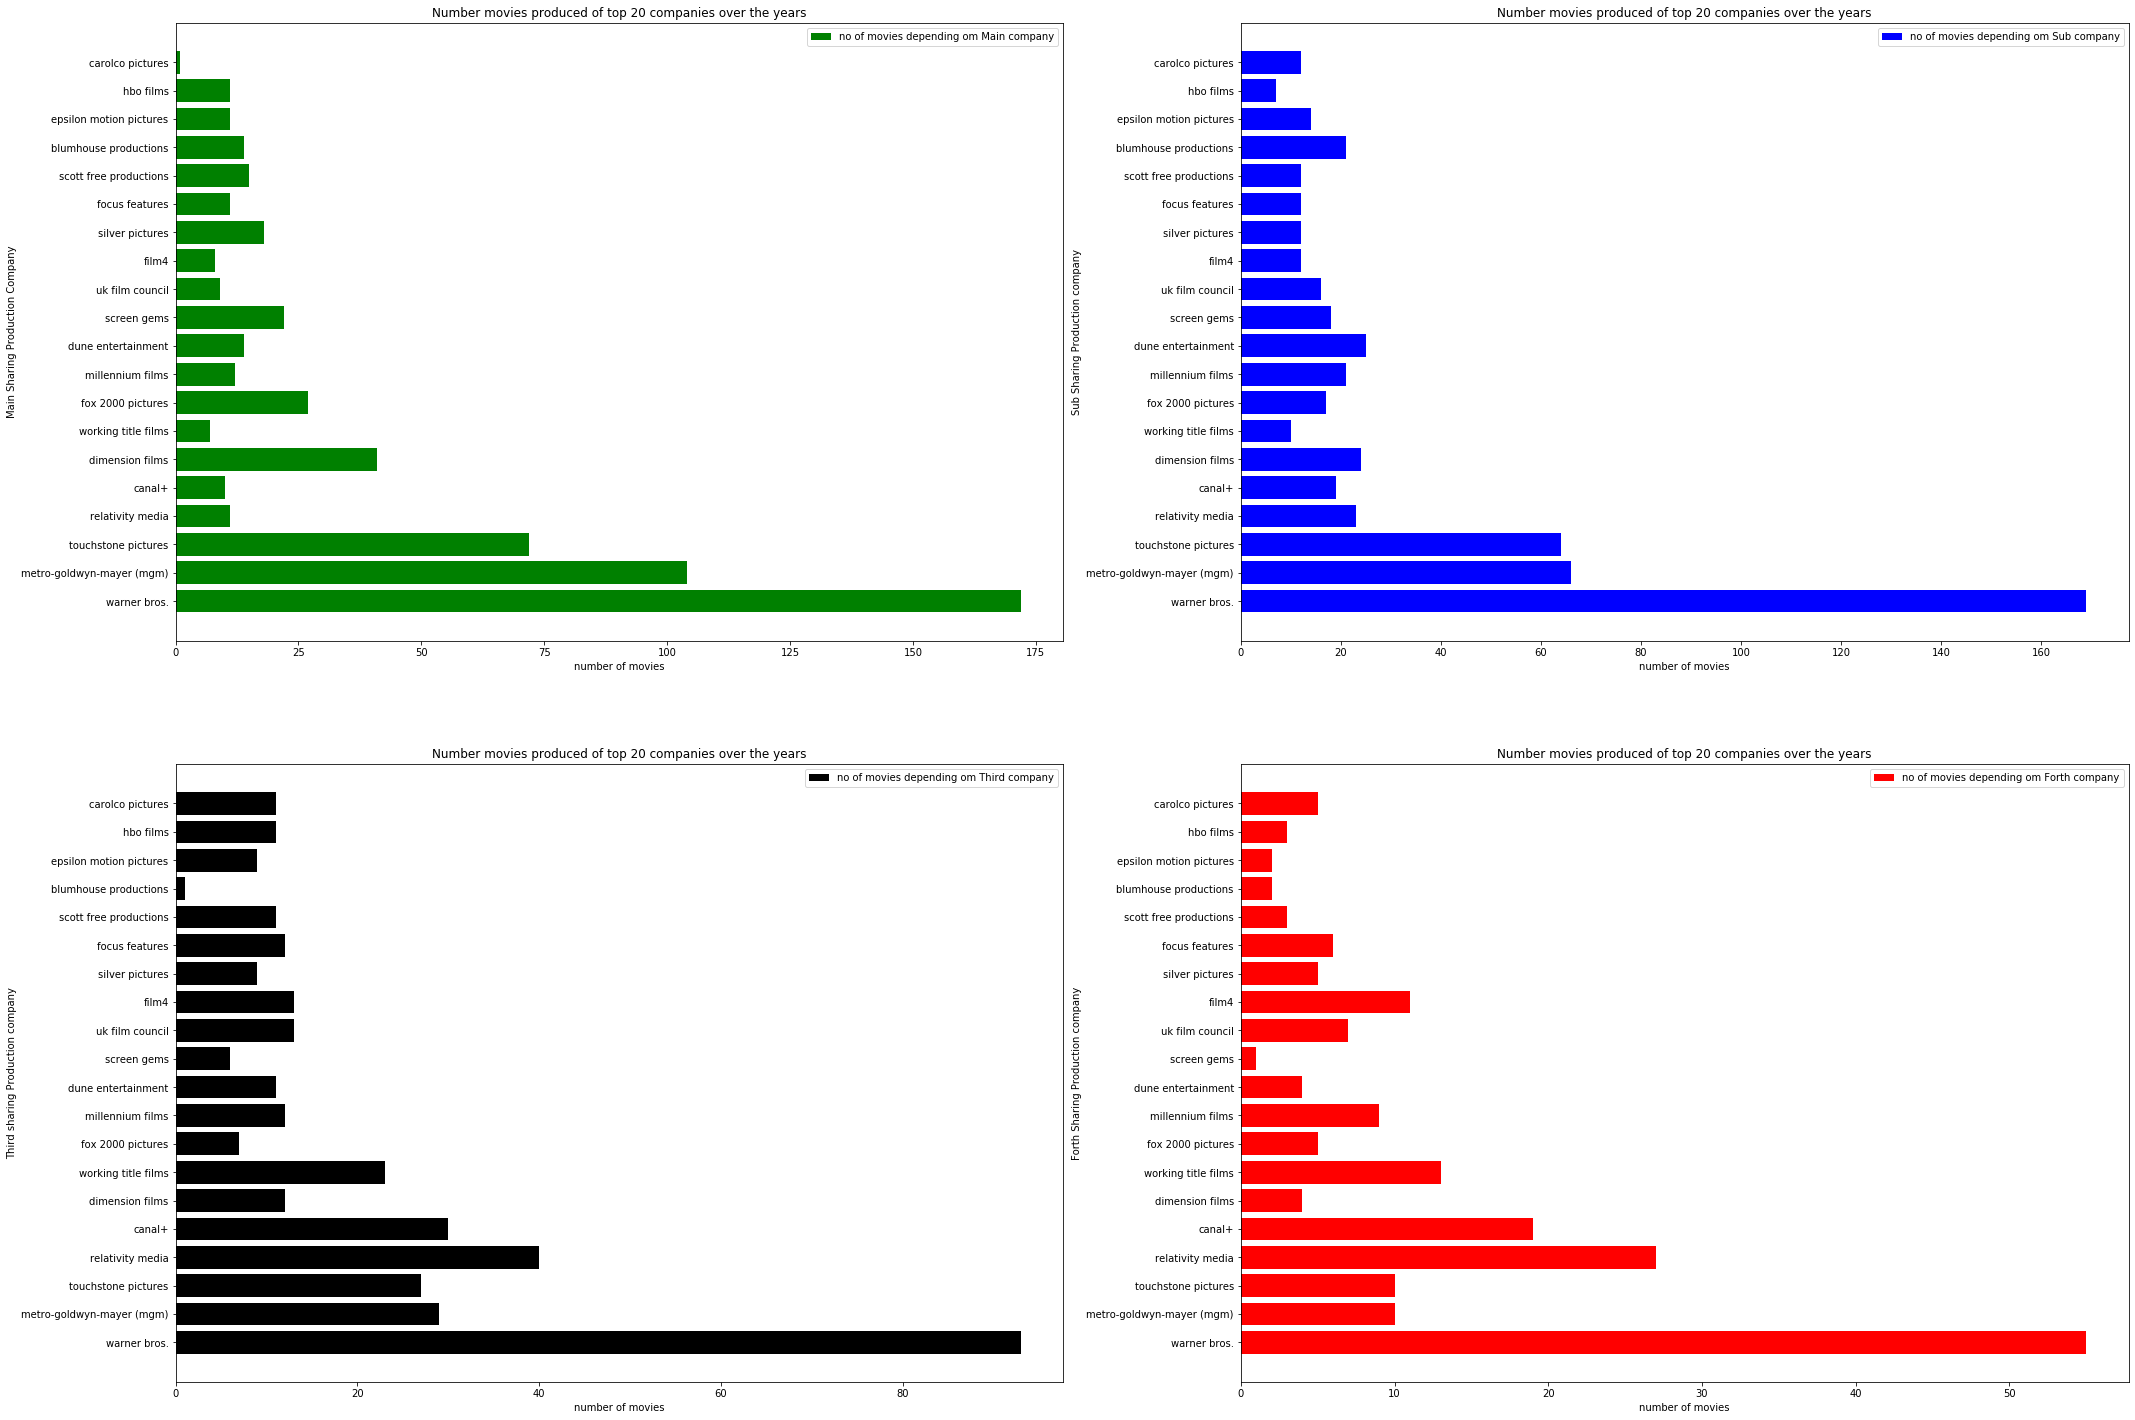

In [19]:
###
# Plot total count of top 20 production companies as main, sub, third and forth sharing in movies over the years ...

plt.figure(figsize=(35,25))
# Main genre plot
plt.subplot(2,2,1)
plt.barh(df_pcom_ed.head(20)['production_company'],df_pcom_ed.head(20)['main_count'],color='g',label='no of movies depending om Main company')
plt.title('Number movies produced of top 20 companies over the years')
plt.ylabel('Main Sharing Production Company')
plt.xlabel('number of movies')
plt.legend()

# Sub genre plot
plt.subplot(2,2,2)
plt.barh(df_pcom_ed.head(20)['production_company'],df_pcom_ed.head(20)['sub_count'],color='b',label='no of movies depending om Sub company')
plt.title('Number movies produced of top 20 companies over the years')
plt.ylabel('Sub Sharing Production company')
plt.xlabel('number of movies')
plt.legend()

# Third genre plot
plt.subplot(2,2,3)
plt.barh(df_pcom_ed.head(20)['production_company'],df_pcom_ed.head(20)['third_count'],color='k',label='no of movies depending om Third company')
plt.title('Number movies produced of top 20 companies over the years')
plt.ylabel('Third sharing Production company')
plt.xlabel('number of movies')
plt.legend()

# Forth genre plot
plt.subplot(2,2,4)
plt.barh(df_pcom_ed.head(20)['production_company'],df_pcom_ed.head(20)['forth_count'],color='r',label='no of movies depending om Forth company')
plt.title('Number movies produced of top 20 companies over the years')
plt.ylabel('Forth Sharing Production company')
plt.xlabel('number of movies')
plt.legend()

plt.show;

Regardless of company position in data frame production_companies 
Top 5 movie companies represent 0.41% of total movies and Top 10 represent 0.52% of total movies


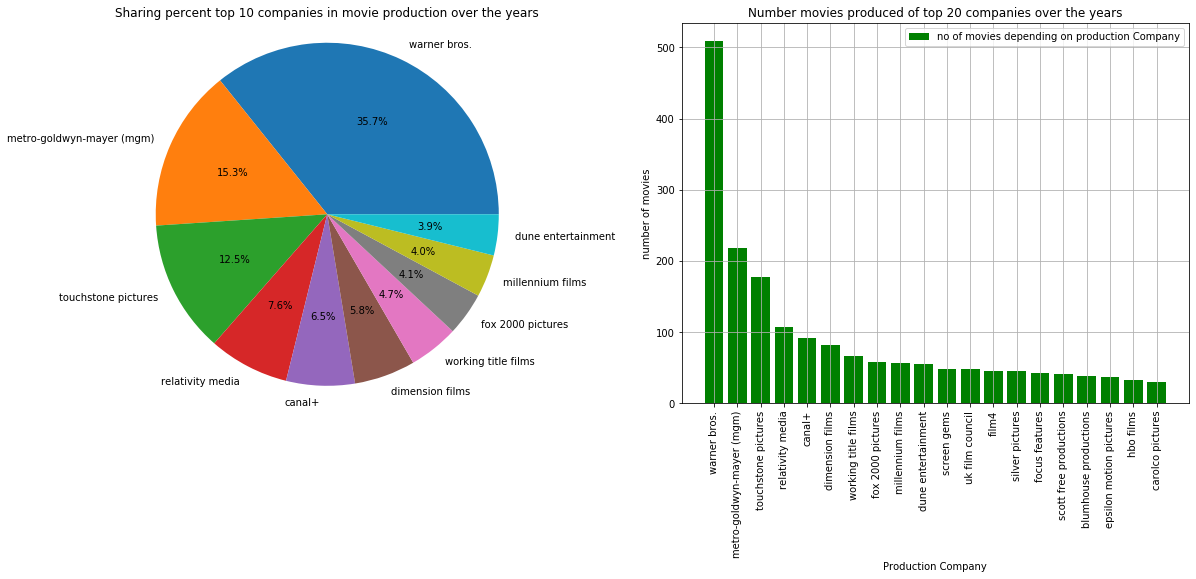

In [20]:
###
# Plot total count of top 10 production companies sharing in movies over the years ...

plt.figure(figsize=(20,7))
# Main genre plot
plt.subplot(1,2,2)
plt.bar(df_pcom_ed.head(20)['production_company'],df_pcom_ed.head(20)['total_counts'],color='g',label='no of movies depending on production Company')
plt.title('Number movies produced of top 20 companies over the years')
plt.xlabel('Production Company')
plt.ylabel('number of movies')
plt.xticks(rotation=90)
plt.legend()
plt.grid()

plt.subplot(1,2,1)
plt.pie(df_pcom_ed.head(10).total_counts,labels=df_pcom_ed.head(10)['production_company'],autopct='%1.1f%%')

plt.title('Sharing percent top 10 companies in movie production over the years')
plt.axis('equal')

plt.show;
perc5=df_pcom_ed.head(5).total_counts.sum()/df_pcom_ed.total_counts.sum()
perc10=df_pcom_ed.head(10).total_counts.sum()/df_pcom_ed.total_counts.sum()
print ('Regardless of company position in data frame production_companies ')
print('Top 5 movie companies represent {:.2f}% of total movies and Top 10 represent {:.2f}% of total movies'.format(perc5,perc10))

In [21]:
###
print ('Top 10 production companies over the years depending on thier position in data frame production_companies')
df_pcom_ed.sort_values(['main_count','sub_count','third_count','forth_count','fifth_count'],ascending=False).head(10)

Top 10 production companies over the years depending on thier position in data frame production_companies


,production_company,main_count,sub_count,third_count,forth_count,fifth_count,total_counts
83,warner bros.,172.0,169.0,93.0,55.0,20,509.0
82,metro-goldwyn-mayer (mgm),104.0,66.0,29.0,10.0,9,218.0
81,touchstone pictures,72.0,64.0,27.0,10.0,5,178.0
80,dimension films,41.0,24.0,12.0,4.0,1,82.0
79,fox 2000 pictures,27.0,17.0,7.0,5.0,2,58.0
78,screen gems,22.0,18.0,6.0,1.0,1,48.0
77,silver pictures,18.0,12.0,9.0,5.0,2,46.0
76,france 2 cinã©ma,17.0,2.0,2.0,4.0,2,27.0
75,scott free productions,15.0,12.0,11.0,3.0,1,42.0
74,dune entertainment,14.0,25.0,11.0,4.0,1,55.0


In [22]:
### Over a decade period , the max total sharing of each production company

bin_edges=[1960,1970,1980,1990,2000,2010,2020]
bin_names=['1960s','1970s','1980s','1990s','2000s','2010s']
df_pcom['decade']=pd.cut(df_pcom.release_year,bin_edges,labels=bin_names)
y=df_pcom.groupby(['decade','main'],as_index=False).count()

total=y['sub']+y['third']+y['forth']+y['fifth']
y['total_share']=total
y=y.sort_values('total_share',ascending=False)

y.drop(columns=['sub','third','forth','fifth','release_year']).head(5).rename(columns={'main':'Production Company'})

,decade,Production Company,total_share
15039,2000s,universal pictures,288.0
14271,2000s,paramount pictures,245.0
12836,2000s,columbia pictures,191.0
15082,2000s,village roadshow pictures,170.0
14992,2000s,twentieth century fox film corporation,161.0


Top 5 sharing companies repeated as the highest share per year


,Company,Repeated as Top of the year
0,universal pictures,21
1,paramount pictures,13
2,twentieth century fox film corporation,9
3,columbia pictures,3
4,columbia pictures corporation,3


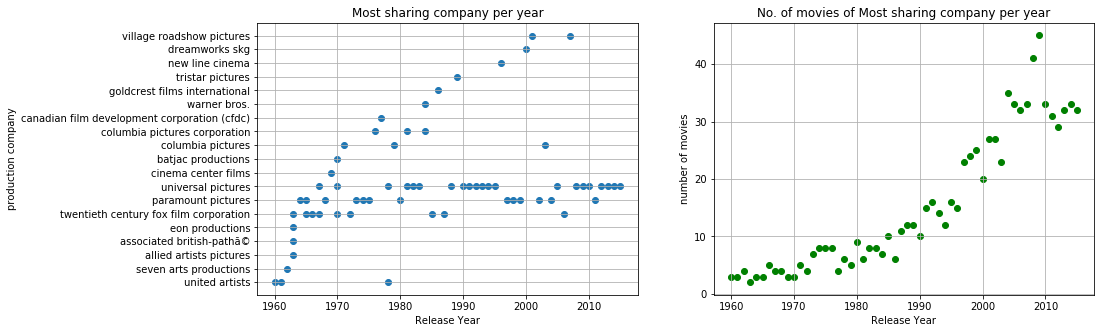

In [24]:
### Most total sharing companies change per each year regardless of position in column
y=df_pcom.groupby(['release_year','main'],as_index=False).count()

total=y['sub']+y['third']+y['forth']+y['fifth']
y['total_share']=total
y1=y.groupby(['release_year','main'],as_index=False).total_share.max()
y2=y.groupby('release_year',as_index=False).total_share.max()
yboth=y2.merge(y1,how='inner')

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.scatter(yboth.release_year,yboth.main,label='Most sharing company');
plt.title('Most sharing company per year')
plt.xlabel('Release Year')
plt.ylabel('production company')
plt.grid()

plt.subplot(1,2,2)
plt.scatter(y2.release_year,y2.total_share,color='g',label='Max no. of Movies of Most sharing company')
plt.title('No. of movies of Most sharing company per year')
plt.xlabel('Release Year')
plt.ylabel('number of movies')
plt.grid()
print('Top 5 sharing companies repeated as the highest share per year')
yboth.main.value_counts().reset_index().head(5).rename(columns={'index':'Company','main':'Repeated as Top of the year'})

### 4. Conclosions on  production_companies share:
 #### A. Most sharing production companies over the years regardless of their position in production_companies column 
 #### From [Number movies produced of top 20 companies over the years] graph
 #### From [Sharing percent top 10 companies in movie production over the years] graph
 * It is obvious that Top 5 total  sharing over the years are:

1. warner bros Company
2. metro-goldwyn-mayer (mgm) Company
3. touchstore pictures Company
4. relativity-media Company
5. canal+ Company



#### B.  Most sharing production companies over the years depending on their position in production_companies column
  ##### From [Number movies produced of top 20 companies over the years] 4 graphs
   It is obvious that:
   
   1. warner bros Company dominats as Top company as main,sub,third or forth sharing company.
   2. metro-goldwyn-mayer (mgm) Company is the second Top company as main or sub sharing company.
   3. touchstore pictures Company is the third Top company as main or sub sharing company.
   4. relativity-media Company is the second Top company as third or forth sharing company.
   5. canal+ Company is the third Top company as third or forth sharing company.
   


#### From [Top 10 production companies over the years depending on thier position in data frame production_companies] Table above   
 * It is obvious that Top 5 total  sharing over the years depending on their position are:
1. warner bros
2. metro-goldwyn-mayer (mgm)	
3. touchstone pictures	
4. dimension films	
5. fox 2000 pictures	


 * These companies (in A and B ) are not in the blow TOP 5 competition which show up in the highest level on number of 
produced movies in the 2000's, this means new companies (Below List) dominates the movie industry.

#### C. The most total sharing production company (company name and its share no.) per decade.
 #### From Decade table above for Top 5 sharing companies over the decades
   * It is obvious that Top 5 total decade sharing companies are concentrated in the 2000's.
      This shows that these companies (universal pictures, paramount pictures, columbia pictures, village 
      roadshow pictures, twentieth century fox film corporation ) dominated movies industry in the 2000's.
      
#### D. The most total sharing production company (company name and its share no.) per year.
 ##### From [Most sharing company per year] and [No. of movies of Most sharing company per year] graphs,
  1.  Top 5 sharing companies repeated as the highest share per year shown above are; universal pictures, 
    paramount pictures, twentieth century fox film corporation, united artists and columbia pictures.
  2. The number of movies of the Top sharing company is increasing over years.
  3. The number of companies recorded the most sharing is decreasing over years
  4. village roadshow pictures is in the 5 sharing companies over the decades and not in the Top 5 per year,
   the other companies are in both, which means village roadshow pictures is less than the other Four 
   companies in TOP 5 competition.
  5. For united artists company which is in top 5 sharing companies per year but not in Top 5 sharing 
   companies over decade, so united artists company is the least in the TOP 5 compition.
     




#### 5. From genre we will answer the following:
   A. Most produced genre over the years regardless of their position in genre column
   
   B. Most produced genre over the years depending on their position in genre column
   
   C. The most total  produced genre (genre name and number) per decade.
   
   D. The most total  produced genre (genre name and number) per year.

In [25]:
### df_e_gen is a new df by removing null values depending on genres

df_e_gen=df_e.dropna(subset=['genres'])
df_e_gen.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10842 entries, 0 to 10865
Data columns (total 15 columns):
id                      10842 non-null int64
popularity              10842 non-null float64
original_title          10842 non-null object
cast                    10767 non-null object
director                10800 non-null object
runtime                 10842 non-null int64
genres                  10842 non-null object
production_companies    9826 non-null object
release_date            10842 non-null datetime64[ns]
vote_count              10842 non-null int64
vote_average            10842 non-null float64
release_year            10842 non-null int64
budget_adj              10842 non-null float64
revenue_adj             10842 non-null float64
profit                  10842 non-null float64
dtypes: datetime64[ns](1), float64(5), int64(4), object(5)
memory usage: 1.3+ MB


In [26]:
###
# Split genres column data: to df_gen df to be used for all below cells

df_gen=df_e_gen.genres.str.lower().str.split("|", n =-1, expand =True)
df_gen['release_year']=df_e_gen.release_year
df_gen.rename(columns={0:'main',1:'sub',2:'third',3:'forth',4:'fifth'},inplace=True)
df_gen.head(2)

,main,sub,third,forth,fifth,release_year
0,action,adventure,science fiction,thriller,None,2015
1,action,adventure,science fiction,thriller,None,2015


In [27]:
###
# main, sub, third, forth and fifth description genre of each movie for all years

main_col=df_gen['main'].value_counts().reset_index().sort_values('main')
sub_col=df_gen['sub'].value_counts().reset_index().sort_values('sub')
third_col=df_gen['third'].value_counts().reset_index().sort_values('third')
forth_col=df_gen['forth'].value_counts().reset_index().sort_values('forth')
fifth_col=df_gen['fifth'].value_counts().reset_index().sort_values('fifth')
main_col.columns=['genre','main_count']
sub_col.columns=['genre','sub_count']
third_col.columns=['genre','third_count']
forth_col.columns=['genre','forth_count']
fifth_col.columns=['genre','fifth_count']

In [28]:
###
# new data frame using merge to combine most repeated generes together regardless of their position in genre col. .

df_gen_ed=main_col.merge(sub_col,how='right').merge(third_col,how='right').merge(forth_col,how='right').merge(fifth_col,how='right')
total=df_gen_ed.main_count+df_gen_ed.sub_count+df_gen_ed.third_count+df_gen_ed.forth_count+df_gen_ed.fifth_count
df_gen_ed['total_counts']=total
df_gen_ed.tail(5)

,genre,main_count,sub_count,third_count,forth_count,fifth_count,total_counts
14,adventure,586,626,183,62,14,1471
15,horror,915,489,186,36,11,1637
16,action,1590,544,198,42,10,2384
17,comedy,2319,990,388,81,15,3793
18,drama,2453,1618,546,124,19,4760


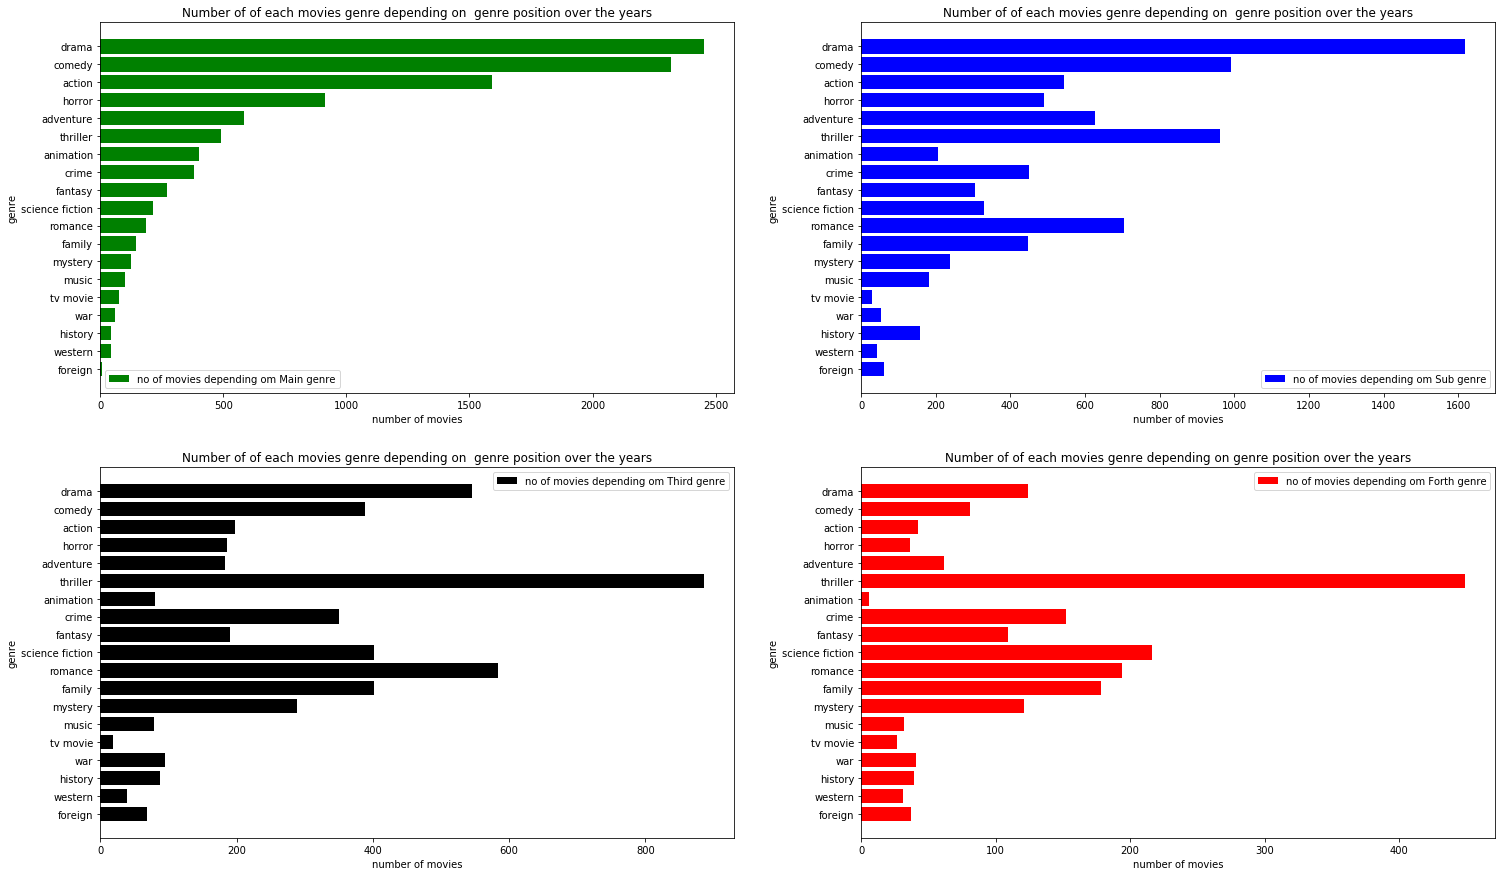

In [29]:
###
# Plot of main, sub, third and forth description genre of each movie ...

plt.figure(figsize=(25,15))
# Main genre plot
plt.subplot(2,2,1)
plt.barh(df_gen_ed['genre'],df_gen_ed['main_count'],color='g',label='no of movies depending om Main genre')
plt.title('Number of of each movies genre depending on  genre position over the years')
plt.ylabel('genre')
plt.xlabel('number of movies')
plt.legend()

# Sub genre plot
plt.subplot(2,2,2)
plt.barh(df_gen_ed['genre'],df_gen_ed['sub_count'],color='b',label='no of movies depending om Sub genre')
plt.title('Number of of each movies genre depending on  genre position over the years')
plt.ylabel('genre')
plt.xlabel('number of movies')
plt.legend()

# Third genre plot
plt.subplot(2,2,3)
plt.barh(df_gen_ed['genre'],df_gen_ed['third_count'],color='k',label='no of movies depending om Third genre')
plt.title('Number of of each movies genre depending on  genre position over the years')
plt.ylabel('genre')
plt.xlabel('number of movies')
plt.legend()

# Forth genre plot
plt.subplot(2,2,4)
plt.barh(df_gen_ed['genre'],df_gen_ed['forth_count'],color='r',label='no of movies depending om Forth genre')
plt.title('Number of of each movies genre depending on genre position over the years')
plt.ylabel('genre')
plt.xlabel('number of movies')
plt.legend()

plt.show;

Regardless of genre position in data frame genre 
Top 5 movie genres represent 0.59% of total movies and Top 10 represent 0.85% of total movies


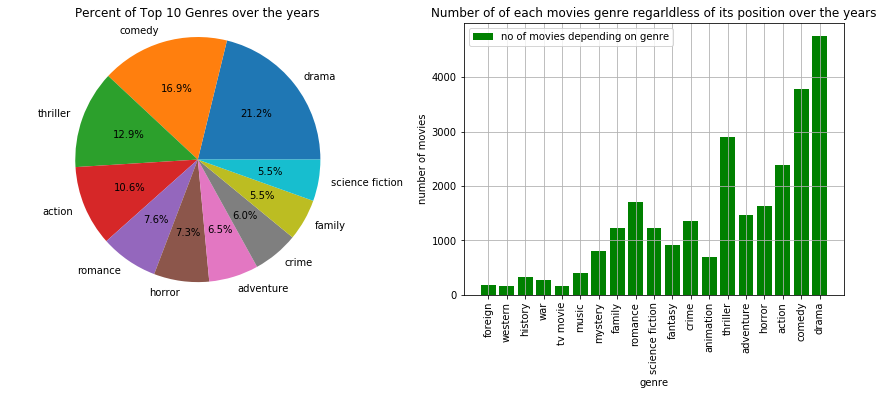

In [30]:
###
# Plot total count of main, sub, third, forth and fifth description genre of each movie ...

plt.figure(figsize=(15,5))
# Main genre plot
plt.subplot(1,2,2)
plt.bar(df_gen_ed['genre'],df_gen_ed['total_counts'],color='g',label='no of movies depending on genre')
plt.title('Number of of each movies genre regarldless of its position over the years')
plt.xlabel('genre')
plt.ylabel('number of movies')
plt.xticks(rotation=90)
plt.legend()
plt.grid()

plt.subplot(1,2,1)
y=df_gen_ed.sort_values('total_counts',ascending=False)
plt.pie(y.head(10).total_counts,labels=y.head(10).genre,autopct='%1.1f%%')

plt.title('Percent of Top 10 Genres over the years')
plt.axis('equal')

plt.show;
perc5=y.head(5).total_counts.sum()/y.total_counts.sum()
perc10=y.head(10).total_counts.sum()/y.total_counts.sum()
print ('Regardless of genre position in data frame genre ')
print('Top 5 movie genres represent {:.2f}% of total movies and Top 10 represent {:.2f}% of total movies'.format(perc5,perc10))

In [31]:
###
print ('Top 10 genres over the years depending on thier position in data frame genre')
df_gen_ed.sort_values(['main_count','sub_count','third_count','forth_count','fifth_count'],ascending=False).head(10)

Top 10 genres over the years depending on thier position in data frame genre


,genre,main_count,sub_count,third_count,forth_count,fifth_count,total_counts
18,drama,2453,1618,546,124,19,4760
17,comedy,2319,990,388,81,15,3793
16,action,1590,544,198,42,10,2384
15,horror,915,489,186,36,11,1637
14,adventure,586,626,183,62,14,1471
13,thriller,491,961,886,449,120,2907
12,animation,403,207,80,6,3,699
11,crime,380,449,350,152,23,1354
10,fantasy,272,304,190,109,41,916
9,science fiction,214,330,401,216,68,1229


In [32]:
### Over decade, the max total_genre repeated

bin_edges=[1960,1970,1980,1990,2000,2010,2020]
bin_names=['1960s','1970s','1980s','1990s','2000s','2010s']
df_gen['decade']=pd.cut(df_gen.release_year,bin_edges,labels=bin_names)
y=df_gen.groupby(['decade','main'],as_index=False).count()

total=y['sub']+y['third']+y['forth']+y['fifth']
y['total_genre']=total
y=y.sort_values('total_genre',ascending=False)

y.drop(columns=['sub','third','forth','fifth','release_year']).head(5).rename(columns={'main':'Genre','total_genre':'total count'})


,decade,Genre,total count
80,2000s,action,1283.0
86,2000s,drama,1193.0
83,2000s,comedy,1046.0
60,1990s,action,807.0
100,2010s,action,630.0


Top 5 sharing companies repeated as the highest share per year


,Genre,Repeated as Top of the year
0,action,37
1,drama,13
2,comedy,6
3,thriller,1


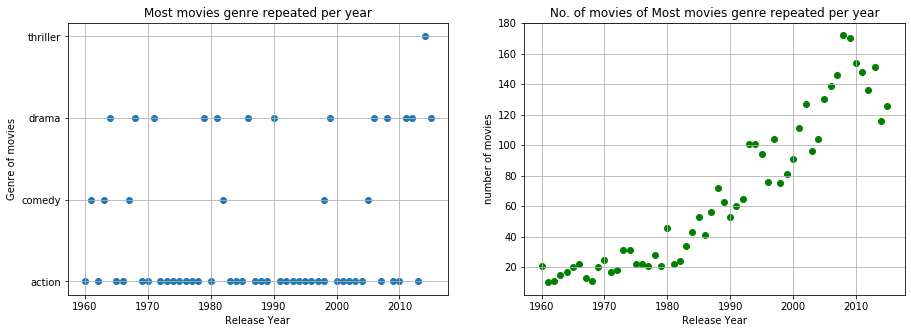

In [33]:
### genre popularity change over the years 
y=df_gen.groupby(['release_year','main'],as_index=False).count()

total=y['sub']+y['third']+y['forth']+y['fifth']
y['total_genre']=total
y1=y.groupby(['release_year','main'],as_index=False).total_genre.max()
y2=y.groupby('release_year',as_index=False).total_genre.max()
yboth=y2.merge(y1,how='left')

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.scatter(yboth.release_year,yboth.main,label='Most movies genre repeated');
plt.title('Most movies genre repeated per year')
plt.xlabel('Release Year')
plt.ylabel('Genre of movies')
plt.grid()

plt.subplot(1,2,2)
plt.scatter(y2.release_year,y2.total_genre,color='g',label='No. of movies of Most movies genre repeated')
plt.title('No. of movies of Most movies genre repeated per year')
plt.xlabel('Release Year')
plt.ylabel('number of movies')
plt.grid()

print('Top 5 sharing companies repeated as the highest share per year')
yboth.main.value_counts().reset_index().rename(columns={'index':'Genre','main':'Repeated as Top of the year'})

### 4. Conclosions on  genre  of movies:
 #### A. Most produced genre over the years regardless of their position in genre column
  ##### From [Number of of each movies genre regarldless of its position over the year] graph
  ##### From [Percent of Top 10 Genres over the years] graph
  
  * Drama, Comedy,Thriller and action movies, as the top genres of the movies, with the highest movie genres 
  produced over the years regardless of thier position in genre column 
  (if this arrangement represent the main, sub and so on target genre of movies) .

#### B.  Most produced genre over the years depending on their position in genre column
   #### From [Number of of each movies genre depending on genre position over the years] 4 graphs
   
   It is obvious that:
   1. Drama and Comedy represent the first and second top genres as the main or sub genres of Top total movies
   2. Action genre is the third top genre as the main genre of Top total movies
   3. Thriller genre is the third top genre as the sub genre of Top total movies
   4. Thriller is the first top genre as the third or forth genre of Top total movies
   5. Romance and Drama genres represent the second and third Top as the third  genre of Top total movies
   6. Sience fictioon and Romance genres represent the second and third Top as the forth genre of Top total
   movies
   
 #### From [Top 10 genres over the years depending on thier position in data frame genre] Table
* Dram, Comedy then Action movies, as the main genre of the movie, are the highest movie genres produced
over the years depending on thier position in genre column (if this arrangement represent the main, sub and so on target genre of movies) .

      
#### C. The most decade total  produced genre (genre name and number).
 #### From Decade table above for Top 5 genres over the decades
   * Action, Drama then Comedy respectively are the highly repeated movie genre.
   * From 1990's to 2010's Productions companies are interested in Action movies mass production.
   * In 2000's Productions companies added  Drama and Comedy movies production to its mass production.
      
#### D. The most total  produced genre (genre name and number) per year.
 ##### From [Most movies genre repeated per year] and [No. of movies of Most movies genre repeated per year] graphs,
   * Action, Drama then Comedy respectively are the highly repeated as the Top of the year movie genre.
   * Number of movies of the Top of the year genre is increasing with year which means:
   * Production Companies is targeting the popular genre with more movies.
     
